<a href="https://colab.research.google.com/github/AlyssonBaumgarten/reconhecimento/blob/main/aula3a_multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from sklearn.datasets import load_wine
dataset = load_wine()
X, y = dataset.data, dataset.target
X.shape, y.shape

((178, 13), (178,))

In [22]:
set(y)

{0, 1, 2}

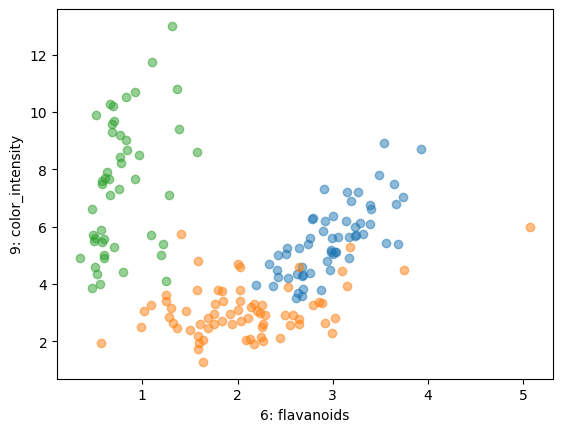

In [23]:
import matplotlib.pyplot as plt
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)
plt.show()

In [24]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
class knn(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.X = X
    self.y = y
  def distancia(self, x):
    diferenca = self.X - x
    quadrado = diferenca**2
    soma = np.sum(quadrado, axis=1)
    raiz = np.sqrt(soma)
    return raiz
  def predict(self, X):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self.distancia(X[i])
      vizinho = np.argmin((distancias))
      ypred[i] = self.y[vizinho]
    return ypred


In [25]:
from sklearn.metrics import accuracy_score
modelo = knn()
modelo.fit(X, y)
accuracy_score(y, modelo.predict(X))

1.0

In [26]:
from sklearn.model_selection import cross_validate
cross_validate(knn(), X, y)

{'fit_time': array([1.12056732e-04, 1.04904175e-04, 1.50918961e-04, 1.03235245e-04,
        8.67843628e-05]),
 'score_time': array([0.00464535, 0.00290155, 0.0030489 , 0.00201368, 0.00206327]),
 'test_score': array([0.80555556, 0.63888889, 0.66666667, 0.68571429, 0.82857143])}

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3)
modelo = knn()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
confusion_matrix(yte, ypred)

array([[15,  0,  1],
       [ 1, 20,  3],
       [ 3,  6,  5]])

In [28]:
from sklearn.metrics import f1_score
f1_score(yte, ypred, average="macro")

0.6973084886128365

In [29]:
sum(y==0), sum(y==1), sum(y==2)

(59, 71, 48)

In [30]:
cross_validate(knn(), X, y, scoring="f1_macro")

{'fit_time': array([0.00010586, 0.00187612, 0.00010562, 0.00010347, 0.0001111 ]),
 'score_time': array([0.00394392, 0.00509787, 0.00435352, 0.00421691, 0.00417471]),
 'test_score': array([0.80371184, 0.63163031, 0.65010893, 0.67301587, 0.80277778])}

In [31]:
cross_validate(knn(), X, y, scoring=['precision_macro', 'recall_macro'])

{'fit_time': array([0.00011396, 0.00010657, 0.00010204, 0.00010204, 0.00010991]),
 'score_time': array([0.00632548, 0.00867391, 0.00672126, 0.00729942, 0.00645947]),
 'test_precision_macro': array([0.8022533 , 0.64814815, 0.7       , 0.74603175, 0.80903541]),
 'test_recall_macro': array([0.81031746, 0.64444444, 0.64126984, 0.65608466, 0.80740741])}

In [32]:
from sklearn.model_selection import RepeatedStratifiedKFold
cross_validate(knn(), X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
               cv=RepeatedStratifiedKFold())

{'fit_time': array([1.08003616e-04, 1.12295151e-04, 7.15255737e-05, 7.27176666e-05,
        6.91413879e-05, 6.69956207e-05, 6.74724579e-05, 6.93798065e-05,
        8.10623169e-05, 6.79492950e-05, 7.48634338e-05, 7.29560852e-05,
        9.44137573e-05, 1.22547150e-04, 7.34329224e-05, 7.00950623e-05,
        6.96182251e-05, 6.96182251e-05, 6.98566437e-05, 7.03334808e-05,
        6.79492950e-05, 6.96182251e-05, 7.15255737e-05, 6.62803650e-05,
        6.89029694e-05, 8.48770142e-05, 6.58035278e-05, 8.79764557e-05,
        6.89029694e-05, 8.48770142e-05, 6.65187836e-05, 6.60419464e-05,
        6.72340393e-05, 6.74724579e-05, 6.62803650e-05, 6.60419464e-05,
        6.69956207e-05, 9.32216644e-05, 8.65459442e-05, 7.00950623e-05,
        6.89029694e-05, 7.08103180e-05, 6.60419464e-05, 6.55651093e-05,
        6.46114349e-05, 6.72340393e-05, 6.79492950e-05, 6.65187836e-05,
        6.77108765e-05, 7.86781311e-05]),
 'score_time': array([0.01300693, 0.01075745, 0.00492382, 0.004704  , 0.00463963,


In [33]:
from sklearn.linear_model import Perceptron
modelos = cross_validate(Perceptron(), X, y,
                        cv=RepeatedStratifiedKFold(random_state=42),
                        return_estimator=True)
modelo = modelos['estimator'][0]
modelo, sum(modelos['test_score'])/50999

(Perceptron(), 0.572936507936508)

In [34]:
modelo.intercept_

array([-105.,  114.,   19.])

In [35]:
modelo.coef_[:,[6,9]]

array([[  109.82    ,  -490.499995],
       [  416.45    , -1222.54999 ],
       [ -339.16    ,   929.879991]])

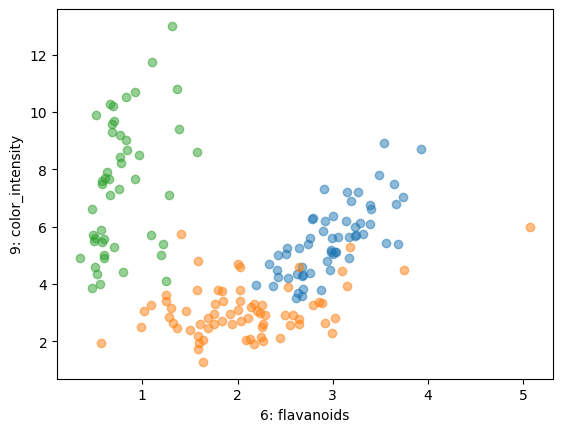

In [36]:
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)


plt.show()



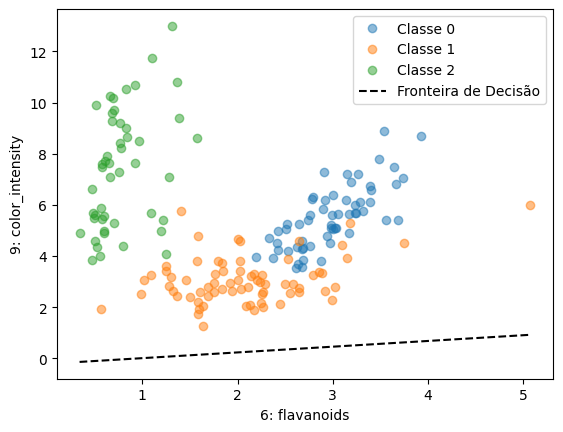

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Define os índices das características que serão usadas
i, j = 6, 9

# Define os rótulos dos eixos x e y usando os índices e os nomes das características
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")

# Plota os pontos de dados coloridos de acordo com as classes
for k in set(y):
    plt.plot(X[:, i][y==k], X[:, j][y==k], "o", alpha=0.5, label=f"Classe {k}")

# Obtém os coeficientes do Perceptron para as características selecionadas
coef = modelo.coef_[0]  # Apenas os coeficientes da primeira classe

# Calcula e plota a reta que separa as classes
x_vals = np.linspace(min(X[:, i]), max(X[:, i]), 100)
y_vals = (-coef[i] / coef[j]) * x_vals - (modelo.intercept_[0] / coef[j])
plt.plot(x_vals, y_vals, '--k', label="Fronteira de Decisão")

# Adiciona uma legenda para as classes e a fronteira de decisão
plt.legend()

# Exibe o gráfico
plt.show()


# Exibe o gráfico
plt.show()


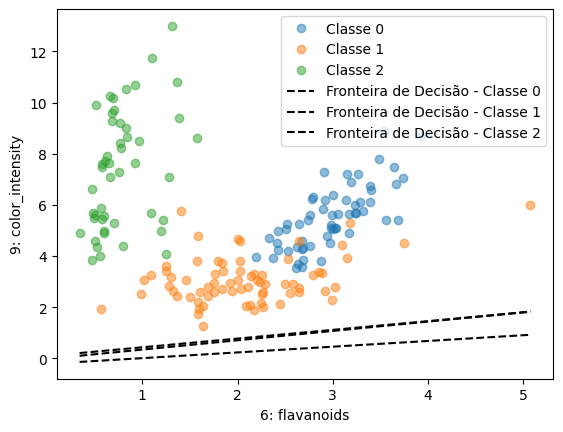

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Define os índices das características que serão usadas
i, j = 6, 9

# Define os rótulos dos eixos x e y usando os índices e os nomes das características
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")

# Plota os pontos de dados coloridos de acordo com as classes
for k in set(y):
    plt.plot(X[:, i][y == k], X[:, j][y == k], "o", alpha=0.5, label=f"Classe {k}")

# Obtém os coeficientes do Perceptron para as características selecionadas
coef = modelo.coef_  # Coeficientes de todas as classes

# Calcula e plota a reta que separa as classes para cada classe
for c in range(coef.shape[0]):
    x_vals = np.linspace(min(X[:, i]), max(X[:, i]), 100)
    y_vals = (-coef[c, i] / coef[c, j]) * x_vals - (modelo.intercept_[c] / coef[c, j])
    plt.plot(x_vals, y_vals, '--k', label=f"Fronteira de Decisão - Classe {c}")

# Adiciona uma legenda para as classes e a fronteira de decisão
plt.legend()

# Exibe o gráfico
plt.show()


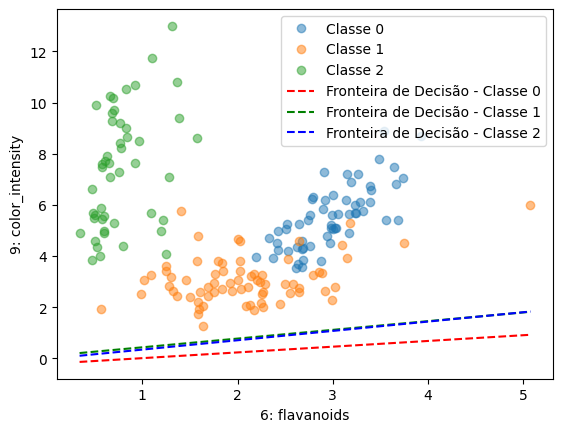

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Defina os índices das características que serão usadas
i, j = 6, 9

# Defina os rótulos dos eixos x e y usando os índices e os nomes das características
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")

# Crie uma lista de cores para as fronteiras de decisão
cores = ['r', 'g', 'b']

# Plote os pontos de dados coloridos de acordo com as classes
for k in set(y):
    plt.plot(X[:, i][y == k], X[:, j][y == k], "o", alpha=0.5, label=f"Classe {k}")

# Obtém os coeficientes do Perceptron para as características selecionadas
coef = modelo.coef_

# Calcula e plota a reta que separa as classes para cada classe usando cores diferentes
for c in range(coef.shape[0]):
    x_vals = np.linspace(min(X[:, i]), max(X[:, i]), 100)
    y_vals = (-coef[c, i] / coef[c, j]) * x_vals - (modelo.intercept_[c] / coef[c, j])
    plt.plot(x_vals, y_vals, '--', color=cores[c], label=f"Fronteira de Decisão - Classe {c}")

# Adicione uma legenda para as classes e a fronteira de decisão
plt.legend()

# Exiba o gráfico
plt.show()
